## Case Study: Joins on Stack Overflow Data

Put together all the types of join you learned in this course to analyze a new dataset: Stack Overflow questions, answers, and tags. This includes calculating and visualizing trends for some notable tags like dplyr and ggplot2. You'll also master one more method for combining tables, the bind_rows verb, which stacks tables on top of each other.

In [7]:
# load data
questions <- readRDS("questions.rds")
question_tags <- readRDS("question_tags.rds")
inventory_parts <- readRDS("inventory_parts.rds")
tags <- readRDS("tags.rds")
answers <- readRDS("answers.rds")


# dplyr
library(dplyr)
library(tidyr)

### Left-joining questions and tags
Three of the Stack Overflow survey datasets are questions, question_tags, and tags:

1. questions: an ID and the score, or how many times the question has been upvoted; the data only includes R-based questions
2. question_tags: a tag ID for each question and the question's id
3. tags: a tag id and the tag's name, which can be used to identify the subject of each question, such as ggplot2 or dplyr

In this exercise, we'll be stitching together these datasets and replacing NAs in important fields.

Note that we'll be using left_joins in this exercise to ensure we keep all questions, even those without a corresponding tag. However, since we know the questions data is all R data, we'll want to manually tag these as R questions with replace_na.

In [8]:
questions_with_tags  <- questions %>%
# Join the questions and question_tags tables
  left_join(question_tags, by = c("id" = "question_id")) %>%
# Join in the tags table
  left_join(tags, by = c("tag_id" = "id")) %>%
# Replace the NAs in the tag_name column
  replace_na(list(tag_name = "only-r"))

head(questions_with_tags)


id,creation_date,score,tag_id,tag_name
22557677,2014-03-21,1,18,regex
22557677,2014-03-21,1,139,string
22557677,2014-03-21,1,16088,time-complexity
22557677,2014-03-21,1,1672,backreference
22557707,2014-03-21,2,NA,only-r
22558084,2014-03-21,2,6419,time-series


### Comparing scores across tags
The complete dataset you created in the last exercise is available to you as questions_with_tags. Let's do a quick bit of analysis on it! You'll use familiar dplyr verbs like group_by, summarize, arrange, and n to find out the average score of the most asked questions.

In [9]:
questions_with_tags %>%
    # Group by tag_name
    group_by(tag_name) %>%
    # Get mean score and num_questions
    summarize(score = mean(score), num_questions = n()) %>%
    # Sort num_questions in descending order
    arrange(desc(num_questions))

`summarise()` ungrouping output (override with `.groups` argument)


tag_name,score,num_questions
only-r,1.2579263,48541
ggplot2,2.6134335,28228
dataframe,2.3143478,18874
shiny,1.4536887,14219
dplyr,1.9470048,14039
plot,2.2353513,11315
data.table,2.9735498,8809
matrix,1.6639807,6205
loops,0.7432511,5149
regex,2.0000000,4912


### What tags never appear on R questions?
The tags table includes all Stack Overflow tags, but some have nothing to do with R. How could you filter for just the tags that never appear on an R question? The tags and question_tags tables have been preloaded for you.

In [10]:
# Using a join, filter for tags that are never on an R question
tags %>%
anti_join(question_tags, by=c("id" = "tag_id"))

id,tag_name
124399,laravel-dusk
124402,spring-cloud-vault-config
124404,spring-vault
124405,apache-bahir
124407,astc
124408,simulacrum
124410,angulartics2
124411,django-rest-viewsets
124414,react-native-lightbox
124417,java-module


### Finding gaps between questions and answers
Now we'll join together questions with answers so we can measure the time between questions and answers.

Make sure to explore the tables and columns in the console before starting the exercise. Can you tell how are questions identified in the questions table? How can you identify which answer corresponds to which question using the answers table?

In [13]:
questions %>%
    # Inner join questions and answers with proper suffixes
    inner_join(answers, by= c("id"= "question_id"), suffix = c("_question", "_answer")) %>%
    # Subtract creation_date_question from creation_date_answer to create gap
    mutate(gap = as.integer(creation_date_answer - creation_date_question)) %>%
    # sort by  gap
    arrange(desc(gap))

id,creation_date_question,score_question,id_answer,creation_date_answer,score_answer,gap
359438,2008-12-11,8,56687377,2019-06-20,0,3843
476726,2009-01-24,12,55544973,2019-04-06,0,3724
713878,2009-04-03,31,55900080,2019-04-29,3,3678
1191689,2009-07-28,12,55978470,2019-05-04,0,3567
520810,2009-02-06,21,53158407,2018-11-05,0,3559
1154242,2009-07-20,144,55739022,2019-04-18,1,3559
1335830,2009-08-26,101,56225536,2019-05-20,0,3554
743812,2009-04-13,170,53896714,2018-12-22,10,3540
1594121,2009-10-20,16,56655584,2019-06-18,0,3528
1401904,2009-09-09,148,56017309,2019-05-07,0,3527


### Joining question and answer counts
We can also determine how many questions actually yield answers. If we count the number of answers for each question, we can then join the answers counts with the questions table.

In [15]:
# Count and sort the question id column in the answers table
answer_counts <- answers %>%
    count(question_id, sort = TRUE)
head(answer_counts)
    # Combine the answer_counts and questions tables
question_answer_counts <- questions %>%
    left_join(answer_counts, by = c("id" = "question_id")) %>%
    # Replace the NAs in the n column
    replace_na(list(n=0))
head(question_answer_counts)

question_id,n
1295955,34
2547402,30
1358003,27
4090169,26
1535021,25
1189759,24


id,creation_date,score,n
22557677,2014-03-21,1,1
22557707,2014-03-21,2,2
22558084,2014-03-21,2,4
22558395,2014-03-21,2,3
22558613,2014-03-21,0,1
22558677,2014-03-21,2,2


### Joining questions, answers, and tags
Let's build on the last exercise by adding the tags table to our previous joins. This will allow us to do a better job of identifying which R topics get the most traction on Stack Overflow. The tables you created in the last exercise have been preloaded for you as answer_counts and question_answer_counts.

In [18]:
tagged_answers <- question_answer_counts %>%
    # Join the question_tags tables
    inner_join(question_tags, by = c("id"="question_id")) %>%
    # Join the tags table
    inner_join(tags, by = c("tag_id"= "id"))

### Average answers by question
The table you created in the last exercise has been preloaded for you as tagged_answers. You can use this table to determine, on average, how many answers each questions gets.

Some of the important variables from this table include: n, the number of answers for each question, and tag_name, the name of each tag associated with each question.

Let's use some of our favorite dplyr verbs to find out how many answers each question gets on average.

In [19]:
tagged_answers %>%
    # Aggregate by tag_name
    group_by(tag_name) %>%
    # Summarize questions and average_answers
    summarize(questions = n(), average_answers = mean(n)) %>%
    # Sort the questions in descending order
    arrange(desc(questions))

`summarise()` ungrouping output (override with `.groups` argument)


tag_name,questions,average_answers
ggplot2,28228,1.1475485
dataframe,18874,1.6674261
shiny,14219,0.9208805
dplyr,14039,1.5459078
plot,11315,1.2261600
data.table,8809,1.4680440
matrix,6205,1.4522160
loops,5149,1.3880365
regex,4912,1.9061482
function,4892,1.2996729


### Joining questions and answers with tags
To learn more about the questions and answers table, you'll want to use the question_tags table to understand the tags associated with each question that was asked, and each answer that was provided. You'll be able to combine these tables using two inner joins on both the questions table and the answers table.

In [21]:
# Inner join the question_tags and tags tables with the questions table
questions_with_tags <- questions %>%
  inner_join(question_tags, by = c("id"="question_id")) %>%
  inner_join(tags, by = c("tag_id" = "id"))

# Inner join the question_tags and tags tables with the answers table
answers_with_tags  <- answers %>%
  inner_join(question_tags, by = c("question_id"="question_id")) %>%
  inner_join(tags, by = c("tag_id" = "id"))

### Binding and counting posts with tags
The tables you created in the previous exercise have been preloaded as questions_with_tags and answers_with_tags. First, you'll want to combine these tables into a single table called posts_with_tags. Once the information is consolidated into a single table, you can add more information by creating a date variable using the lubridate package, which has been preloaded for you.

In [23]:
library(lubridate)

# Combine the two tables into posts_with_tags
posts_with_tags <- bind_rows(questions_with_tags %>% mutate(type = "question"),
                              answers_with_tags %>% mutate(type = "answer"))


# Add a year column, then aggregate by type, year, and tag_name
by_type_year_tag <- posts_with_tags %>%
mutate(year = year(creation_date)) %>%
count(type, year, tag_name)

### Visualizing questions and answers in tags
In the last exercise, you modified the posts_with_tags table to add a year column, and aggregated by type, year, and tag_name. The modified table has been preloaded for you as by_type_year_tag, and has one observation for each type (question/answer), year, and tag. Let's create a plot to examine the information that the table contains about questions and answers for the dplyr and ggplot2 tags. 

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

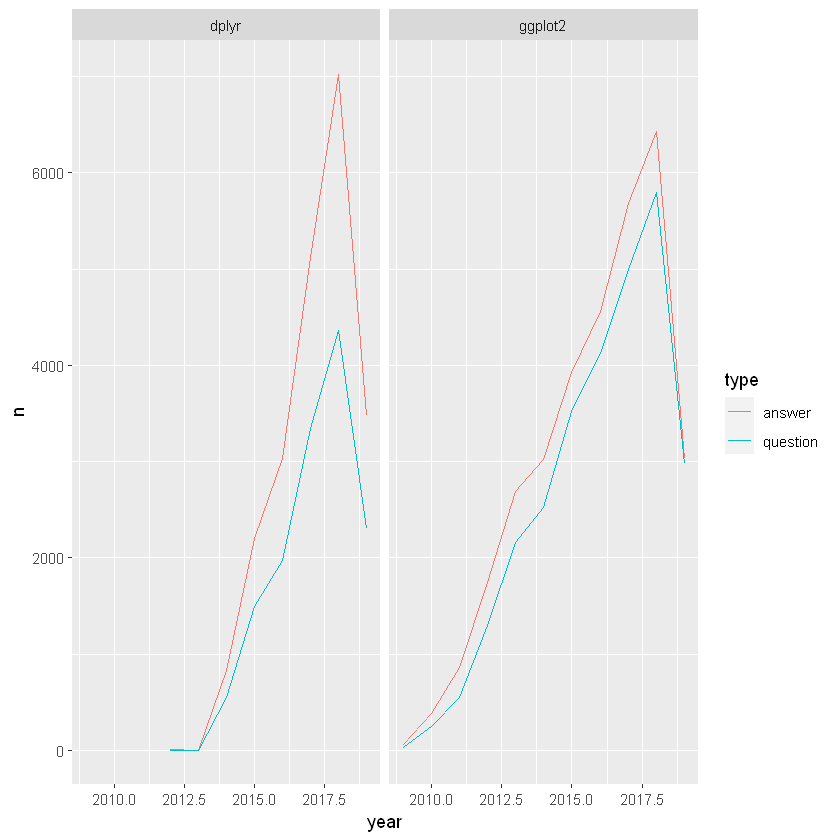

In [25]:
library(ggplot2)

# Filter for the dplyr and ggplot2 tag names 
by_type_year_tag_filtered <- by_type_year_tag %>%
  filter(tag_name %in% c("dplyr", "ggplot2"))

# Create a line plot faceted by the tag name 
ggplot(by_type_year_tag_filtered, aes(year, n, color = type)) +
  geom_line() +
  facet_wrap(~ tag_name)